<a href="https://colab.research.google.com/github/sarvesh2000/ezfinup/blob/vaishnav/Reliance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Data Collection
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
key="483bd89d87mshce534f1bd4ba6b0p182fcdjsnf08d8fc19c04"

In [2]:
df = pdr.get_data_yahoo('RELIANCE.NS')
df1 = df. reset_index()['Close']
  

In [3]:

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [5]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [8]:
### Create the Stacked LSTM model
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [9]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
#adding new lstm

model.add(LSTM(50))


model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [10]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=10,verbose=2)

Epoch 1/50
70/70 - 10s - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0136 - val_accuracy: 0.0030
Epoch 2/50
70/70 - 1s - loss: 8.8460e-04 - accuracy: 0.0000e+00 - val_loss: 0.0105 - val_accuracy: 0.0030
Epoch 3/50
70/70 - 2s - loss: 8.2543e-04 - accuracy: 0.0000e+00 - val_loss: 0.0159 - val_accuracy: 0.0030
Epoch 4/50
70/70 - 2s - loss: 9.2917e-04 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_accuracy: 0.0030
Epoch 5/50
70/70 - 2s - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0169 - val_accuracy: 0.0030
Epoch 6/50
70/70 - 2s - loss: 8.5588e-04 - accuracy: 0.0000e+00 - val_loss: 0.0084 - val_accuracy: 0.0030
Epoch 7/50
70/70 - 2s - loss: 5.7937e-04 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0030
Epoch 8/50
70/70 - 2s - loss: 7.1008e-04 - accuracy: 0.0000e+00 - val_loss: 0.0085 - val_accuracy: 0.0030
Epoch 9/50
70/70 - 2s - loss: 6.0680e-04 - accuracy: 0.0000e+00 - val_loss: 0.0101 - val_accuracy: 0.0030
Epoch 10/50
70/70 - 2s - loss: 7.6740e-04 - accuracy:

In [11]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [12]:
##Transformback to original form --- rescaling
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [13]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict


In [14]:

len(test_data)

431

In [15]:
x_input = test_data[331:].reshape(1,-1)


In [16]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [17]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
    



In [18]:

day_new=np.arange(1,101) #testdata 100indexes
day_pred=np.arange(101,111) #101-131-predicted 

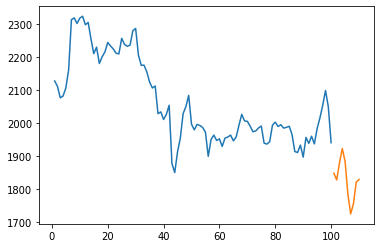

In [19]:

plt.plot(day_new,scaler.inverse_transform(df1[1131:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))


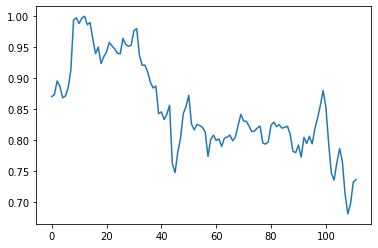

In [20]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1129:])
plt.savefig('foo.png')